Labolatorium 3 Oszka Mrozowicz

In [3]:
pip install ucimlrepo

In [6]:
import pandas as pd
import numpy as np

In [5]:
from ucimlrepo import fetch_ucirepo

automobile = fetch_ucirepo(id=10)
# data (as pandas dataframes)
X = automobile.data.features
y = automobile.data.targets

# metadata
print(automobile.metadata)

# variable information
print(automobile.variables)

{'uci_id': 10, 'name': 'Automobile', 'repository_url': 'https://archive.ics.uci.edu/dataset/10/automobile', 'data_url': 'https://archive.ics.uci.edu/static/public/10/data.csv', 'abstract': "From 1985 Ward's Automotive Yearbook", 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 205, 'num_features': 25, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['symboling'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1985, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5B01C', 'creators': ['Jeffrey Schlimmer'], 'intro_paper': None, 'additional_info': {'summary': 'This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.  The second rating corresponds to the degree to which th

In [10]:
df = pd.concat([X,y], axis = 1)
print("Rozmiar oryginalnego zbioru danych:", df.shape)
df.head()

Rozmiar oryginalnego zbioru danych: (205, 26)


,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2


In [13]:
df.replace('?', np.nan, inplace=True)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

df.dropna(inplace=True)
print(df.shape)


(159, 26)


/tmp/ipython-input-2395448144.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


Dokonać zamiany wartości tekstowych na numeryczne przy użyciu dwóch poznanych metod, usuwając oryginalny atrybut.



In [17]:
#Label Encoding
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

cat_cols = ['fuel-system', 'engine-location', 'drive-wheels',
            'body-style', 'num-of-doors', 'aspiration',
            'fuel-type', 'make']

df_encoded =df.copy()


#to gdzie jest porzadek liczbowy uzywam ordinal encoder, to gdzie nie ma, badz nie ma znaczenia - onehotencoder
ordinal_cols = ['fuel-system', 'engine-location', 'drive-wheels']
ordinal_encoder = OrdinalEncoder()
df_encoded[ordinal_cols] = ordinal_encoder.fit_transform(df_encoded[ordinal_cols])

onehot_cols = ['body-style', 'num-of-doors', 'aspiration', 'fuel-type', 'make']
onehot_encoder = OneHotEncoder()
onehot_encoded = onehot_encoder.fit_transform(df_encoded[onehot_cols])
#robie dataframe
onehot_feature_names = onehot_encoder.get_feature_names_out(onehot_cols)
df_onehot = pd.DataFrame(onehot_encoded.toarray(), columns=onehot_feature_names, index=df_encoded.index)

#polaczone
df_encoded = pd.concat([df_encoded.drop(onehot_cols, axis=1), df_onehot], axis=1)
df_encoded.head()

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,make_8.0,make_9.0,make_10.0,make_11.0,make_12.0,make_13.0,make_14.0,make_15.0,make_16.0,make_17.0
3,13950.0,30,24,5500.0,102.0,10.0,3.4,3.19,4.0,109,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17450.0,22,18,5500.0,115.0,8.0,3.4,3.19,4.0,136,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,17710.0,25,19,5500.0,110.0,8.5,3.4,3.19,4.0,136,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,23875.0,20,17,5500.0,140.0,8.3,3.4,3.13,4.0,131,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,16430.0,29,23,5800.0,101.0,8.8,2.8,3.50,4.0,108,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Dla atrybutów numerycznych, których wartości prezentują lewo- lub prawoskośność, zastosować poznane metody poprawy symetrii. Można zastosować dowolne rozwiązania (nie tylko logarytm i pierwiastek), do uzyskania finalnego rozwiązania warto zastosować jedno rozwiązanie, które zapewnia najbardziej zauważalny efekt na histogramie wynikowym.

In [22]:
#zad 4
from scipy import stats

num_cols = df_encoded.select_dtypes(include = 'number').columns
skewness = df_encoded[num_cols].skew().sort_values(ascending=False)
print("Skośność (prawoskośność dodatnia, lewoskośność ujemna):")
print(skewness)

Skośność (prawoskośność dodatnia, lewoskośność ujemna):
make_12.0            12.609520
make_5.0             12.609520
body-style_0.0        8.830684
make_2.0              7.139963
make_1.0              6.122215
make_0.0              6.122215
body-style_1.0        5.420862
make_7.0              5.420862
make_11.0             4.898053
make_13.0             4.898053
make_10.0             4.487709
make_3.0              4.153651
make_16.0             4.153651
make_8.0              3.635374
make_17.0             3.427842
make_6.0              3.427842
make_14.0             3.244979
make_4.0              3.081988
fuel-type_0.0         2.802143
num-of-cylinders      2.749285
compression-ratio     2.710242
body-style_4.0        2.568437
make_9.0              2.464829
aspiration_1.0        1.775611
price                 1.591601
make_15.0             1.554581
engine-size           1.490610
width                 0.916846
horsepower            0.916663
wheel-base            0.914750
normalized-los

In [26]:
df_transformed = df_encoded.copy()
for col in skewness.index:
  if abs(skewness[col]) >1:
    #  Box-Cox do wartosci dodatnich
    if (df_transformed[col]>0).all():
      df_transformed[col], _ = stats.boxcox(df_transformed[col])
    # Yeo-Johnson
    else:
      df_transformed[col], _ = stats.yeojohnson(df_transformed[col])

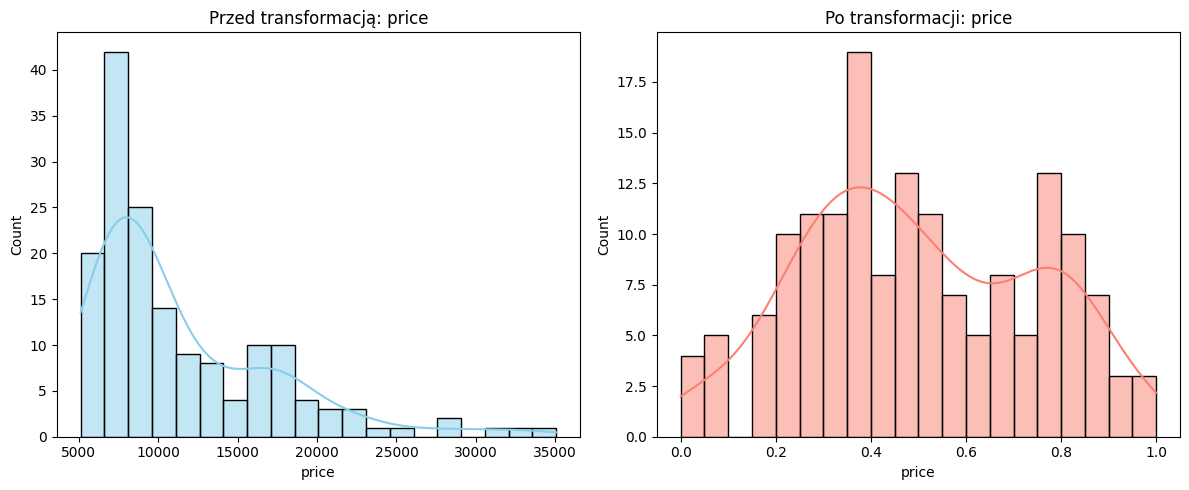

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

col = 'price'
plt.figure(figsize=(12,5))

#histogram PRZED transformacja
plt.subplot(1, 2, 1)
sns.histplot(df_encoded[col], bins=20, color='skyblue', edgecolor='black', kde=True)
plt.title(f"Przed transformacją: {col}")
#histogram PO transformacji
plt.subplot(1, 2, 2)
sns.histplot(df_transformed[col], bins=20, color='salmon', edgecolor='black', kde=True)
plt.title(f"Po transformacji: {col}")

plt.tight_layout()
plt.show()

Dokonać normalizacji lub standaryzacji atrybutów numerycznych. Wartości w atrybutach numerycznych powinny w tym celu zostać zamienione na nowe (przetransformowane).

In [27]:
#zad 5
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_transformed[num_cols] = scaler.fit_transform(df_transformed[num_cols])
df_transformed.head()



,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,make_8.0,make_9.0,make_10.0,make_11.0,make_12.0,make_13.0,make_14.0,make_15.0,make_16.0,make_17.0
3,0.819734,-0.323313,-0.414945,0.831733,0.201279,0.664804,0.556703,-0.413240,1.043965,-0.162595,...,-0.259064,-0.357295,-0.214599,-0.19803,-0.079556,-0.19803,-0.285714,-0.492125,-0.230174,-0.272625
4,1.209432,-1.565772,-1.402122,0.831733,0.625812,-1.260947,0.556703,-0.413240,1.043965,0.794770,...,-0.259064,-0.357295,-0.214599,-0.19803,-0.079556,-0.19803,-0.285714,-0.492125,-0.230174,-0.272625
6,1.232880,-1.099850,-1.237593,0.831733,0.462530,-0.586043,0.556703,-0.413240,1.043965,0.794770,...,-0.259064,-0.357295,-0.214599,-0.19803,-0.079556,-0.19803,-0.285714,-0.492125,-0.230174,-0.272625
8,1.653303,-1.876386,-1.566652,0.831733,1.442223,-0.834632,0.556703,-0.638386,1.043965,0.648761,...,-0.259064,-0.357295,-0.214599,-0.19803,-0.079556,-0.19803,-0.285714,-0.492125,-0.230174,-0.272625
10,1.111125,-0.478620,-0.579475,1.477884,0.168622,-0.258156,-1.484399,0.750015,1.043965,-0.207779,...,-0.259064,-0.357295,-0.214599,-0.19803,-0.079556,-0.19803,-0.285714,-0.492125,-0.230174,-0.272625
